In [23]:
from T_UNet_A import t_unet_a
from T_UNet_A_D import t_unet_a_d
from T_UNet_A_D_AS import t_unet_a_d_as
from U_Net import u_net
from U_Net_D import u_net_d
from loss import dice_loss

In [24]:
model_t_unet_a = t_unet_a('adam', (256, 256, 1), dice_loss)

In [25]:
model_t_unet_a.load_weights('../model/model-T_u_a_d-maproad.h5')

In [26]:
model_t_unet_a_d = t_unet_a_d('adam', (256, 256, 1), dice_loss)

In [27]:
model_t_unet_a_d.load_weights('../model/model-T_u_a_d-maproad.h5')

In [28]:
model_t_unet_a_d_as = t_unet_a_d_as('adam', (256, 256, 1), dice_loss)

In [29]:
model_t_unet_a_d_as.load_weights('../model/model-T_u-a_d_aspp-maproad.h5')

In [30]:
model_u_net = u_net('adam', (256, 256, 1), dice_loss)

In [31]:
model_u_net.load_weights('../model/model-T_unet-maproad.h5')

In [32]:
model_u_net_d = u_net_d('adam', (256, 256, 1), dice_loss)

In [33]:
model_u_net_d.load_weights('../model/model-T_unet_d-maproad.h5')

In [34]:
model_u_net_fc2d = u_net('adam', (256, 256, 1), dice_loss)

In [35]:
model_u_net_fc2d.load_weights('../model/model-T_unet-maproad-fc2d.weights.h5')

In [36]:
models_with_names = {'U-Net': model_u_net, 'U-Net-D': model_u_net_d, 'T-UNet-A': model_t_unet_a,
                     'T-UNet-A-D': model_t_unet_a_d, 'T-UNet-A-D-AS': model_t_unet_a_d_as, 'U-Net-FC2D': model_u_net_fc2d}

In [37]:
from single_prediction import predict_image_and_plot, predict_image

In [38]:
image_path = '../training_dataset/tianditu/test/custom/photo_2023-04-12_15-45-12.jpg'

1/1 [==============================] - 1s 1s/step


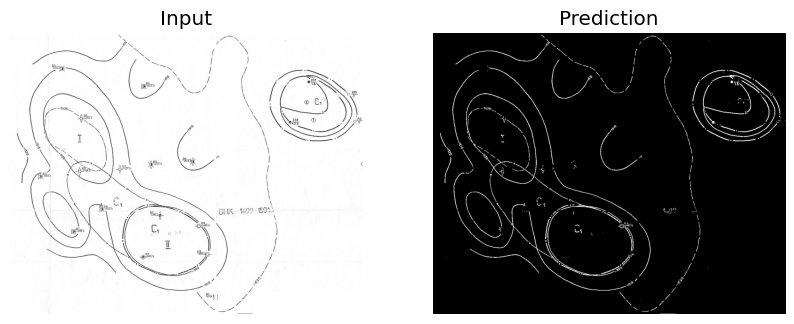

In [39]:
predict_image_and_plot(image_path, model_t_unet_a)

1/1 [==============================] - 2s 2s/step


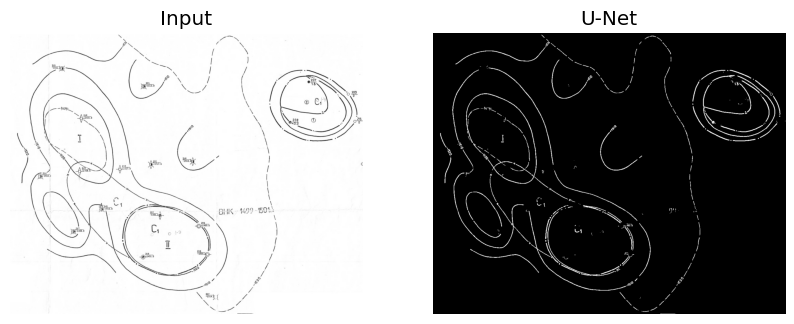

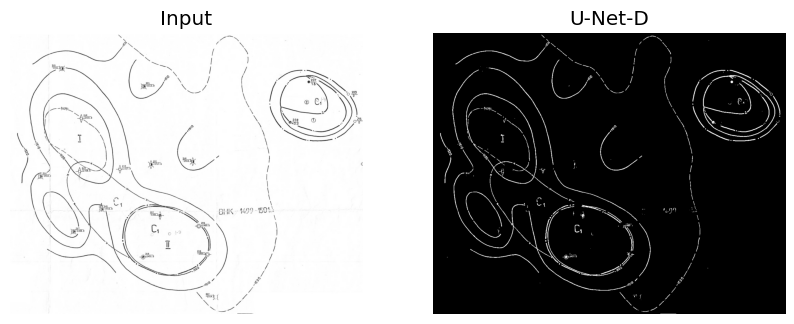

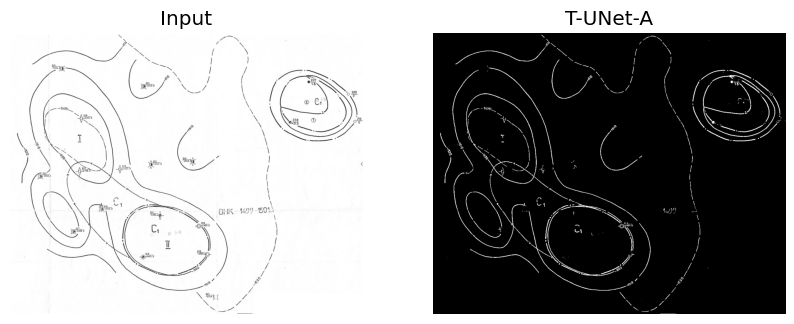

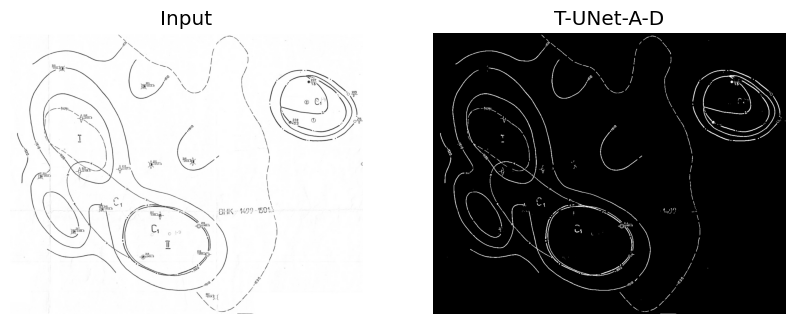

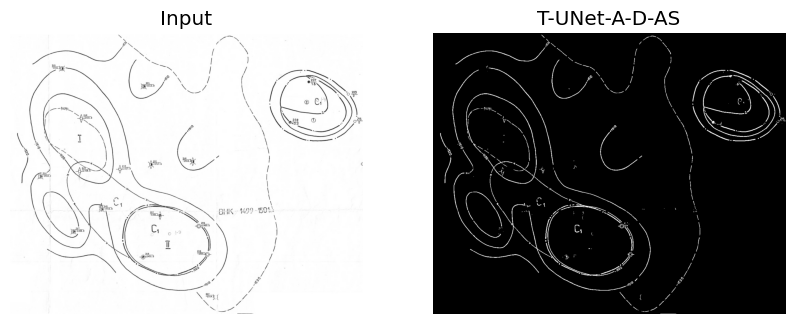

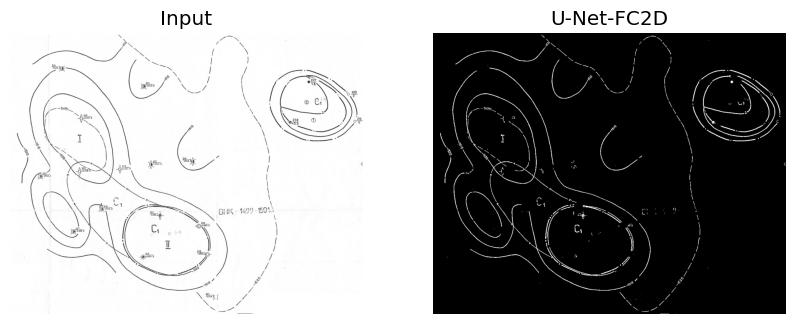

In [40]:
for name, model in models_with_names.items():
    predict_image_and_plot(image_path, model, name)

1/1 [==============================] - 1s 831ms/step


(-0.5, 255.5, 255.5, -0.5)

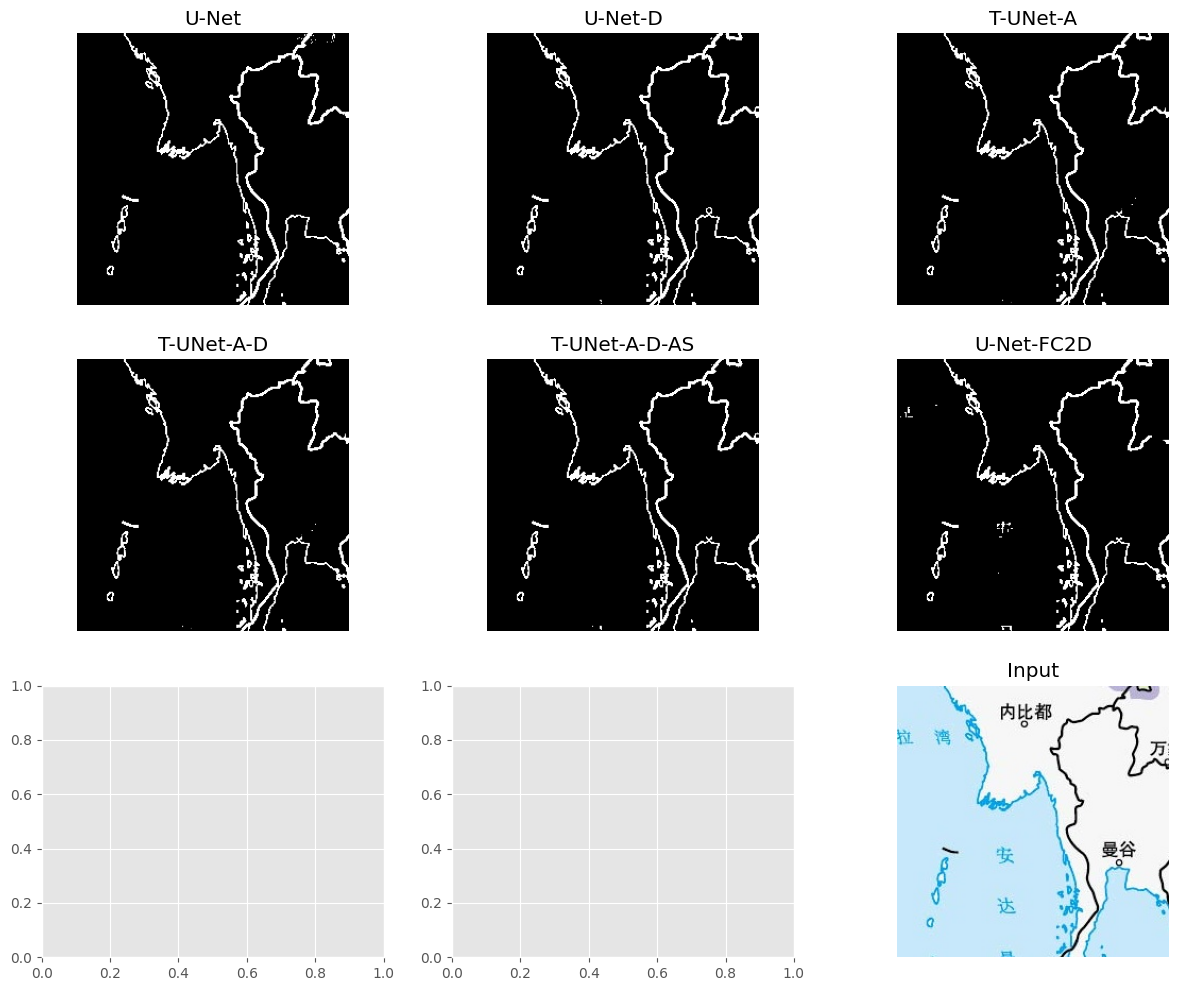

In [41]:
import matplotlib.pyplot as plt
import numpy as np

num_models = len(models_with_names) + 1
columns = min(num_models, 3)
rows = (num_models + 2) // 3
image_path = '../training_dataset/tianditu/test/images/33.jpg'

fig, axs = plt.subplots(rows, columns, figsize=(5 * columns, 4 * rows))
for i, (name, model) in enumerate(models_with_names.items()):
    pred_img = predict_image(image_path, model)
    axs[i // columns, i % columns].imshow(pred_img.astype(np.uint8))
    axs[i // columns, i % columns].set_title(name)
    axs[i // columns, i % columns].axis('off')

axs[rows - 1, columns - 1].imshow(plt.imread(image_path))
axs[rows - 1, columns - 1].set_title('Input')
axs[rows - 1, columns - 1].axis('off')

In [42]:
# Evaluate the models

from dataloader import get_data

In [45]:
test_images, test_masks = get_data('../training_dataset/tianditu/test/', train=True)

Getting and resizing images ... 
Done!


In [46]:
for name, model in models_with_names.items():
    print(f'Evaluating {name}')
    model.evaluate(test_images, test_masks)

Evaluating U-Net
2/2 [==============================] - 6s 1s/step - loss: 0.0537 - dsc: 0.9495 - tp: 0.9557 - tn: 0.9983 - prec: 0.9390 - recall: 0.9603
Evaluating U-Net-D
2/2 [==============================] - 6s 1s/step - loss: 0.0628 - dsc: 0.9399 - tp: 0.9599 - tn: 0.9970 - prec: 0.9434 - recall: 0.9365
Evaluating T-UNet-A
2/2 [==============================] - 2s 396ms/step - loss: 0.0687 - dsc: 0.9336 - tp: 0.9446 - tn: 0.9974 - prec: 0.9264 - recall: 0.9411
Evaluating T-UNet-A-D
2/2 [==============================] - 2s 396ms/step - loss: 0.0687 - dsc: 0.9336 - tp: 0.9446 - tn: 0.9974 - prec: 0.9264 - recall: 0.9411
Evaluating T-UNet-A-D-AS
2/2 [==============================] - 2s 413ms/step - loss: 0.0689 - dsc: 0.9333 - tp: 0.9529 - tn: 0.9968 - prec: 0.9357 - recall: 0.9312
Evaluating U-Net-FC2D
2/2 [==============================] - 6s 1s/step - loss: 0.1012 - dsc: 0.8992 - tp: 0.9117 - tn: 0.9953 - prec: 0.8962 - recall: 0.9029
